# Notebook 2b - Exploratory Data Analysis: Air Quality Data

This notebook explores the air quality data providing overviews and visualisations describing the dataset with commentary. 
A function is created to read in all the dataframes for each year - which are then concatenated together. 
After some formatting, we explore Good/Moderate/Unhealthy Days per year (by state) and Changes in air pollutant levels over time (by state), to get an overview of what the data is telling us. 
Finally we create a merged dataframe for further eda and modelling in subsequent notebooks.

---

# Imports

In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [44]:
import pandas as pd

def import_aqi_data(folder_path):
    """
    Import annual AQI dataframes from CSV files into a folder.

    Args:
    takes in a path to the the file .

    Returns:
    a dictionary containing pandas dataframes, with keys as 'aqi_year'.
    """
    aqi_dataframes = {}

    # Iterating through the files in the folder
    for file_name in os.listdir(folder_path):
        # Checking if the file is a CSV file and follows the naming format
        if file_name.endswith('.csv') and file_name.startswith('annual_aqi_by_county_'):
            # Extracting the year from file name
            year = file_name.split('_')[-1].split('.')[0]
            # Reading in the CSV file into a pandas dataframe
            df = pd.read_csv(os.path.join(folder_path, file_name))
            # Storing the dataframe in the dictionary with the key 'aqi_year'
            aqi_dataframes[f'aqi_{year}'] = df

    return aqi_dataframes

folder_path = '../data'
all_aqi_dataframes = import_aqi_data(folder_path)

# Concatenating all the dataframes
aq_df = pd.concat(all_aqi_dataframes.values(), ignore_index=True)

[Description of the data from the epa website](https://www.epa.gov/outdoor-air-quality-data/about-air-data-reports)

## Inspecting and Formatting

In [45]:
aq_df.head()

State      County  Year  Days with AQI  Good Days  Moderate Days  \
0  Alabama     Cullman  1985            214        144             59   
1  Alabama      Etowah  1985            282        176             81   
2  Alabama   Jefferson  1985            365        202            130   
3  Alabama      Mobile  1985            284        214             58   
4   Alaska  Anchorage   1985            365        228            116   

   Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
0                                   11               0                    0   
1                                   23               2                    0   
2                                   25               7                    1   
3                                   11               1                    0   
4                                   19               2                    0   

   Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
0               0      150                   87          44        0   
1               0      154                   97          45        0   
2               0      202                  100          48      113   
3               0      172                   71          40        0   
4               0      154                   84          38      292   

   Days NO2  Days Ozone  Days PM2.5  Days PM10  
0         0         214           0          0  
1         0         257           0         25  
2         0         171           0         81  
3         0         255           0         29  
4         0          46           0         27

In [46]:
aq_df.columns

Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days PM2.5', 'Days PM10'],
      dtype='object')

Putting State and County columns in Lower Case

In [47]:
aq_df['State'] = aq_df['State'].str.lower()
aq_df['County'] = aq_df['County'].str.lower()

In [48]:
aq_df.head()

State      County  Year  Days with AQI  Good Days  Moderate Days  \
0  alabama     cullman  1985            214        144             59   
1  alabama      etowah  1985            282        176             81   
2  alabama   jefferson  1985            365        202            130   
3  alabama      mobile  1985            284        214             58   
4   alaska  anchorage   1985            365        228            116   

   Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
0                                   11               0                    0   
1                                   23               2                    0   
2                                   25               7                    1   
3                                   11               1                    0   
4                                   19               2                    0   

   Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
0               0      150                   87          44        0   
1               0      154                   97          45        0   
2               0      202                  100          48      113   
3               0      172                   71          40        0   
4               0      154                   84          38      292   

   Days NO2  Days Ozone  Days PM2.5  Days PM10  
0         0         214           0          0  
1         0         257           0         25  
2         0         171           0         81  
3         0         255           0         29  
4         0          46           0         27

In [49]:
aq_df.to_csv('../data/air_quality_master.csv')

## Overview of Good, Moderate Unhealthy Days per year, by state

Since we make line plots for each state (and these line plots are somewhat crowded by colours), we place focus on looking at the general shape of the distribution to understand the trends. 
The trends here describe the number of days of air quality as classified by EPA's standardised chart for Good/Moderate/Unhealthy for senstitive groups/Unhealthy/Very unhealthy/Hazardous days for sensitive populations.
One could look at each line to get specific state information, however we addess state specific information in the next notebook. 

**Good Days**

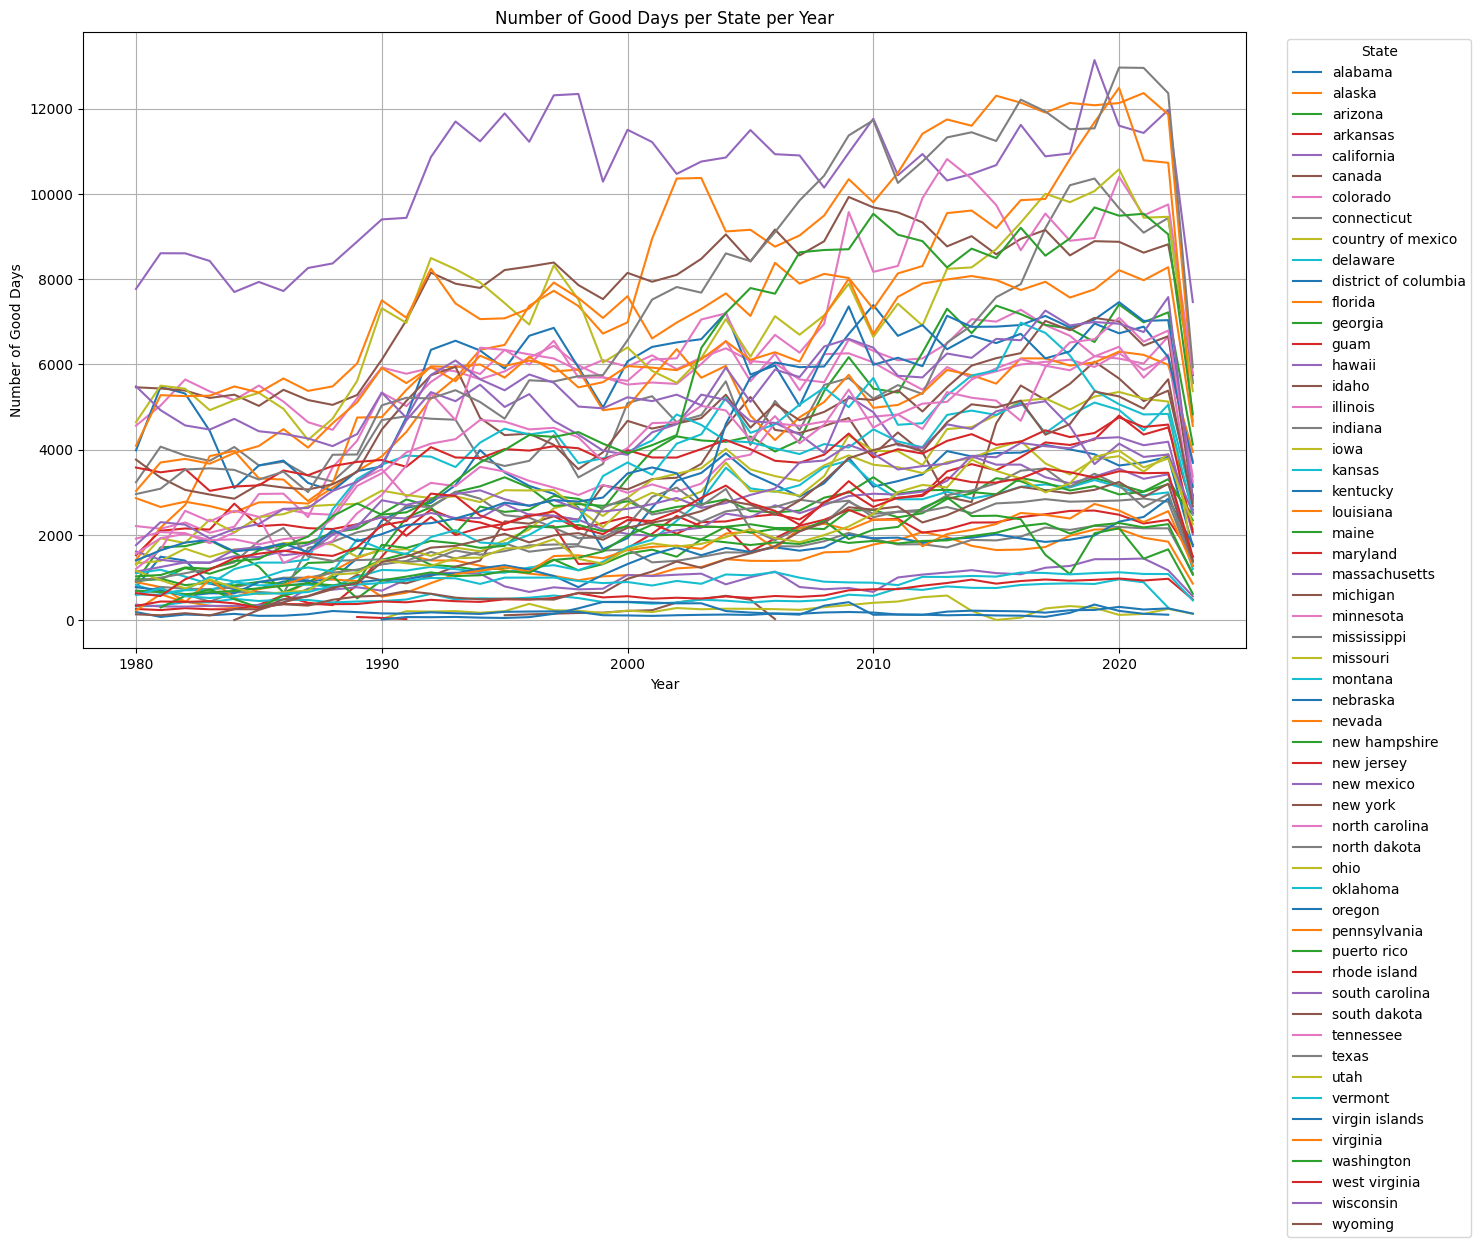

<Figure size 640x480 with 0 Axes>

In [50]:
good_days_per_state_per_year = aq_df.groupby(['State', 'Year'])['Good Days'].sum().reset_index()

states = good_days_per_state_per_year['State'].unique()

plt.figure(figsize=(15, 8)) 

for state in states:
    state_data = good_days_per_state_per_year[good_days_per_state_per_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Good Days'], label=state)

plt.title('Number of Good Days per State per Year')
plt.xlabel('Year')
plt.ylabel('Number of Good Days')
plt.legend(title='State', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show();

plt.savefig('../images/number of good days per state per year')

A general upward trend accross all states for number of good days in air quality. 

**Moderate days**

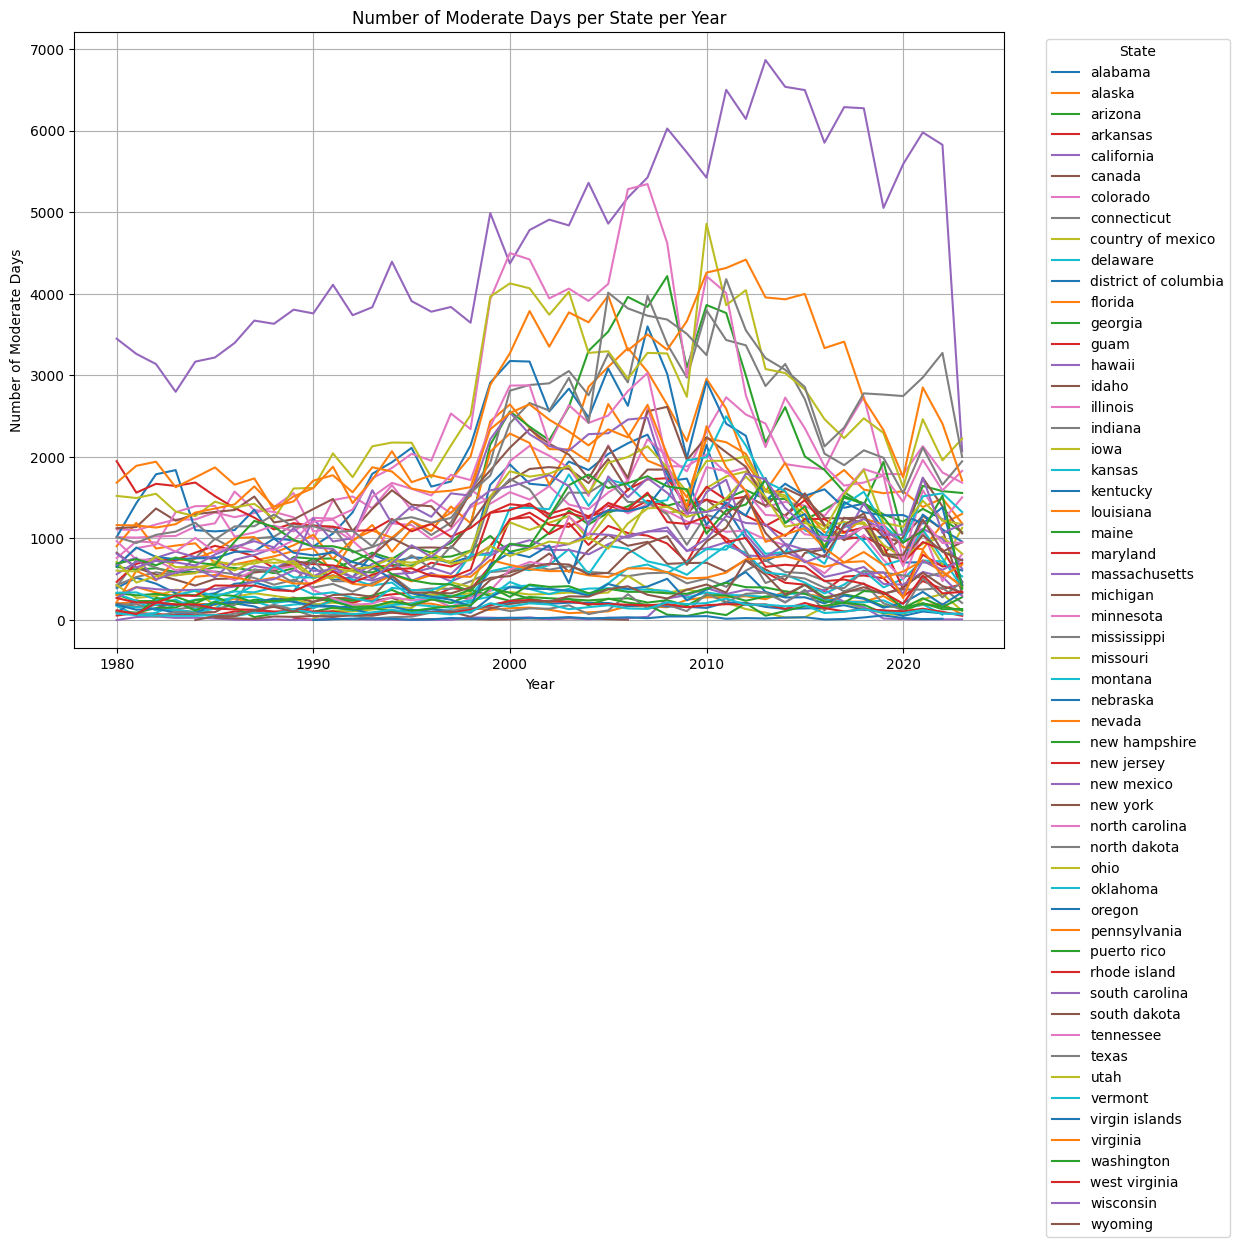

<Figure size 640x480 with 0 Axes>

In [51]:
moderate_days_per_state_per_year = aq_df.groupby(['State', 'Year'])['Moderate Days'].sum().reset_index()

states = moderate_days_per_state_per_year['State'].unique()

plt.figure(figsize=(12, 8))  

for state in states:
    state_data = moderate_days_per_state_per_year[moderate_days_per_state_per_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Moderate Days'], label=state)

plt.title('Number of Moderate Days per State per Year')
plt.xlabel('Year')
plt.ylabel('Number of Moderate Days')
plt.legend(title='State', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()

plt.savefig('../images/number of moderate days per state per year')

A notable rise in number of moderate days accross all states around 1998, and then a slight average downward trend in number of moderate days. 

**Unhealthy for sensitive groups days**

In [52]:
usg_days_per_state_per_year = aq_df.groupby(['State', 'Year'])['Unhealthy for Sensitive Groups Days'].sum().reset_index()

states = usg_days_per_state_per_year['State'].unique()

plt.figure(figsize=(12, 8))  

for state in states:
    state_data = usg_days_per_state_per_year[usg_days_per_state_per_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Unhealthy for Sensitive Groups Days'], label=state)

plt.title('Number of Unhealthy for Sensitive Groups Days per State per Year')
plt.xlabel('Year')
plt.ylabel('Number of Unhealthy for Sensitive Groups Days')

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

plt.savefig('../images/number of healthy for sensitive groups days per state per year')

<Figure size 640x480 with 0 Axes>

From around 2010 onwards the number of days that were marked as unhealthy for sensitive groups dropped significantly accross all states. 

**Unhealthy days**

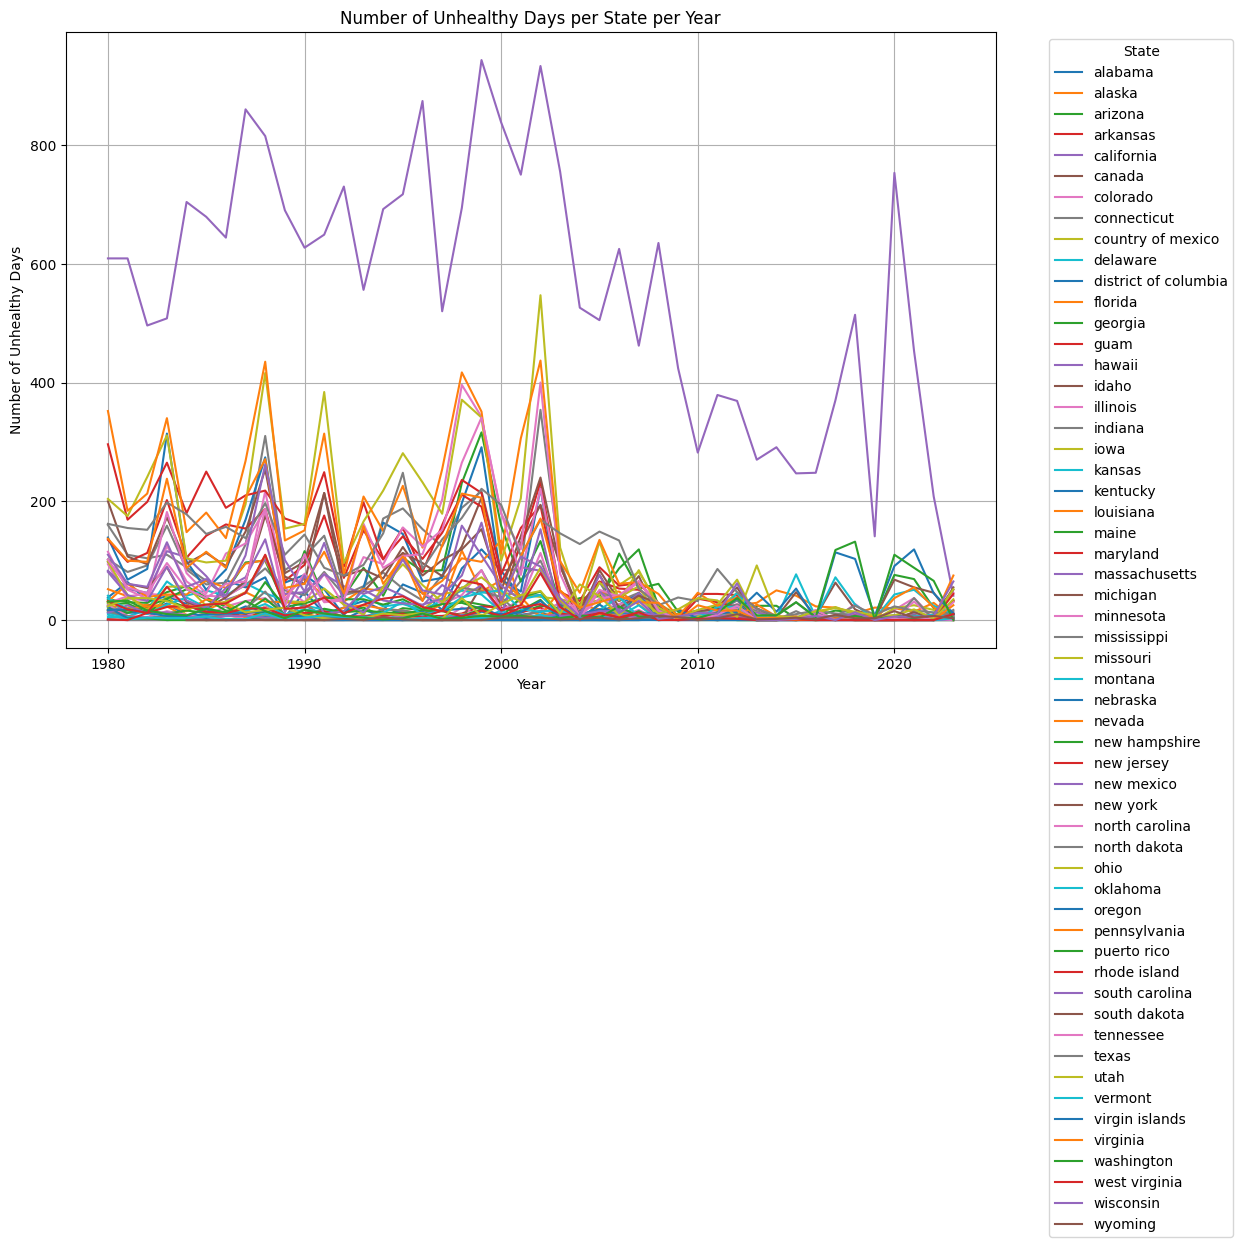

<Figure size 640x480 with 0 Axes>

In [53]:
unhealthy_days_per_state_per_year = aq_df.groupby(['State', 'Year'])['Unhealthy Days'].sum().reset_index()

states = unhealthy_days_per_state_per_year['State'].unique()

plt.figure(figsize=(12, 8))  

for state in states:
    state_data = unhealthy_days_per_state_per_year[unhealthy_days_per_state_per_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Unhealthy Days'], label=state)

plt.title('Number of Unhealthy Days per State per Year')
plt.xlabel('Year')
plt.ylabel('Number of Unhealthy Days')

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

plt.savefig('../images/number of unhealthy days per state per year')

From around 2002 onwards the number of days that were marked as unhealthy dropped significantly accross all states.

**very unhealthy days**

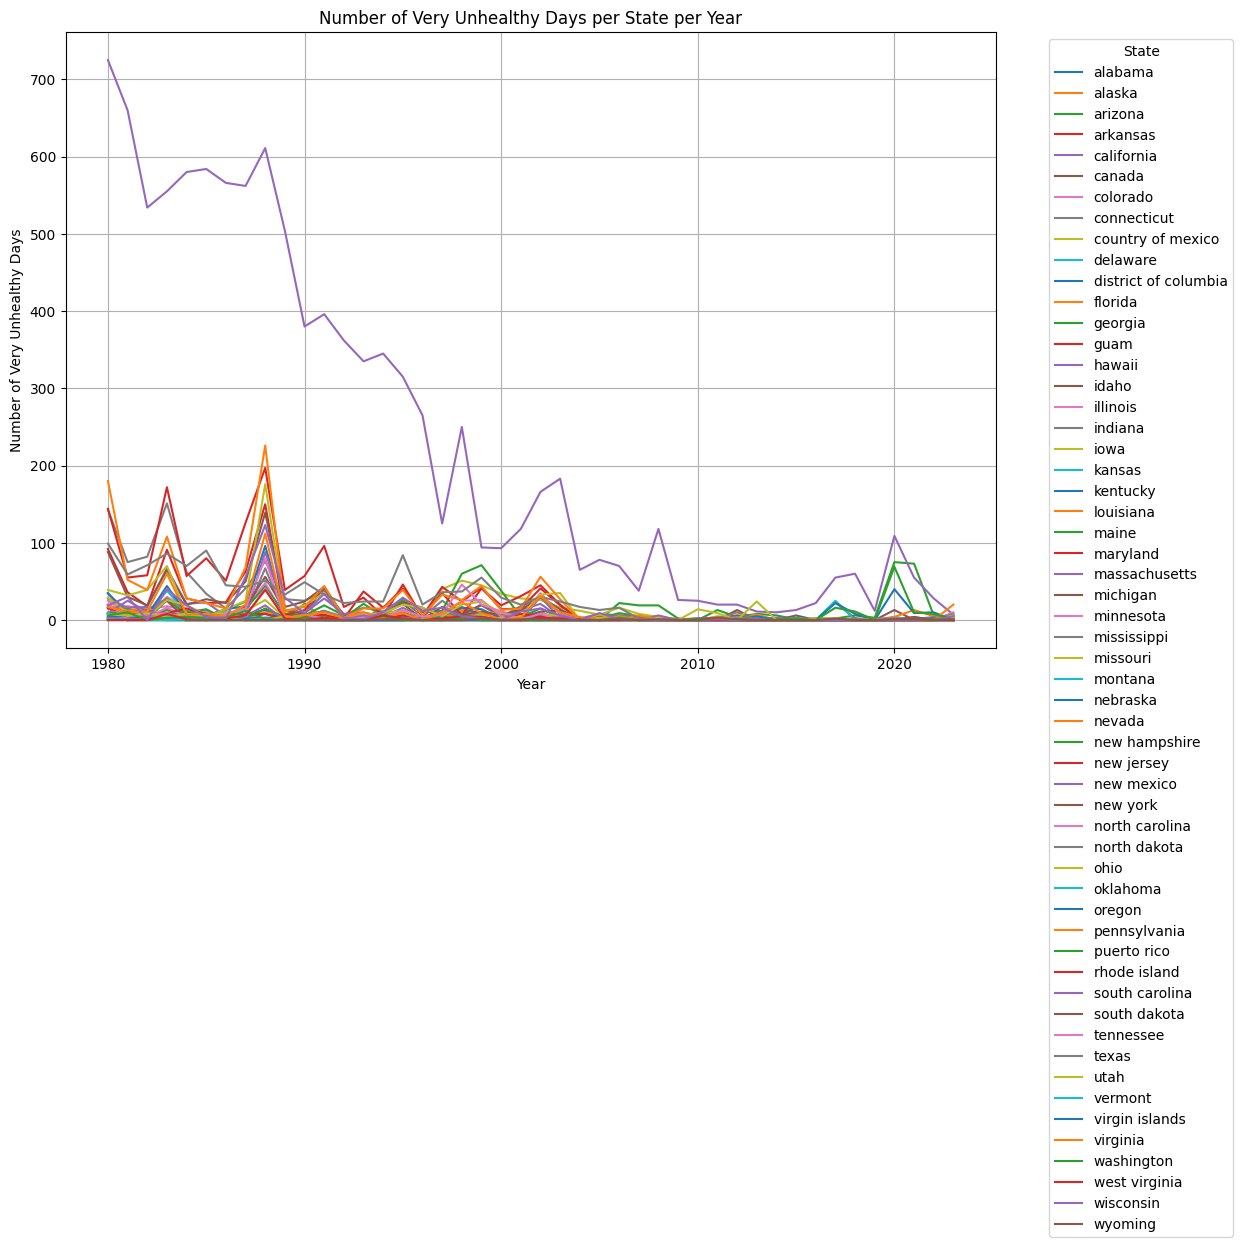

<Figure size 640x480 with 0 Axes>

In [54]:
very_unhealthy_days_per_state_per_year = aq_df.groupby(['State', 'Year'])['Very Unhealthy Days'].sum().reset_index()

states = very_unhealthy_days_per_state_per_year['State'].unique()

plt.figure(figsize=(12, 8)) 

for state in states:
    state_data = very_unhealthy_days_per_state_per_year[very_unhealthy_days_per_state_per_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Very Unhealthy Days'], label=state)

plt.title('Number of Very Unhealthy Days per State per Year')
plt.xlabel('Year')
plt.ylabel('Number of Very Unhealthy Days')

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

plt.savefig('../images/number of very unhealthy days per state per year')

From around 1988 onwards the number of days that were marked as very unhealthy dropped significantly accross all states.

**Hazardous days** 

In [55]:
hazardous_days_per_state_per_year = aq_df.groupby(['State', 'Year'])['Hazardous Days'].sum().reset_index()

states = hazardous_days_per_state_per_year['State'].unique()

plt.figure(figsize=(12, 8))  

for state in states:
    state_data = hazardous_days_per_state_per_year[hazardous_days_per_state_per_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Hazardous Days'], label=state)

plt.title('Number of Hazardous Days per State per Year')
plt.xlabel('Year')
plt.ylabel('Number of Hazardous Days')

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

plt.savefig('../images/number of hazardous days per state per year')

<Figure size 640x480 with 0 Axes>

The smaller scale (y-axis) for measured hazardous days in air quality is significantly smaller than all other classifications for air quality, which would be as expected since it is unlikely any state will have prolongued hazardous air quality. We do however note the hazardous air quality spikes in 2020 for Oregan (blue line), California (purple line), Washington (green line). These can be attributed to the [Western United States Wildfire Season](https://en.wikipedia.org/wiki/2020_Western_United_States_wildfire_season).

The trends accross all 5 graphs show us that overall the number of good days for air quality  accross all states is on a slow upward trajectory, however the number of hazardous days in air quality also appears to becoming more frequent with more frequent hazardous air quality spikes as time goes on. 

## Overview of changes in air pollutant levels over time, for each state

Since we make line plots for each state (and these line plots are somewhat crowded by colours), we place focus on looking at the general shape of the distribution to understand the trends.
The trends here describe the changes (in a year) of the days where the air pollutant plotted was the main pollutant measured that day. 
One could look at each line to get specific state information, however we addess state specific information in the next notebook.

**CO**

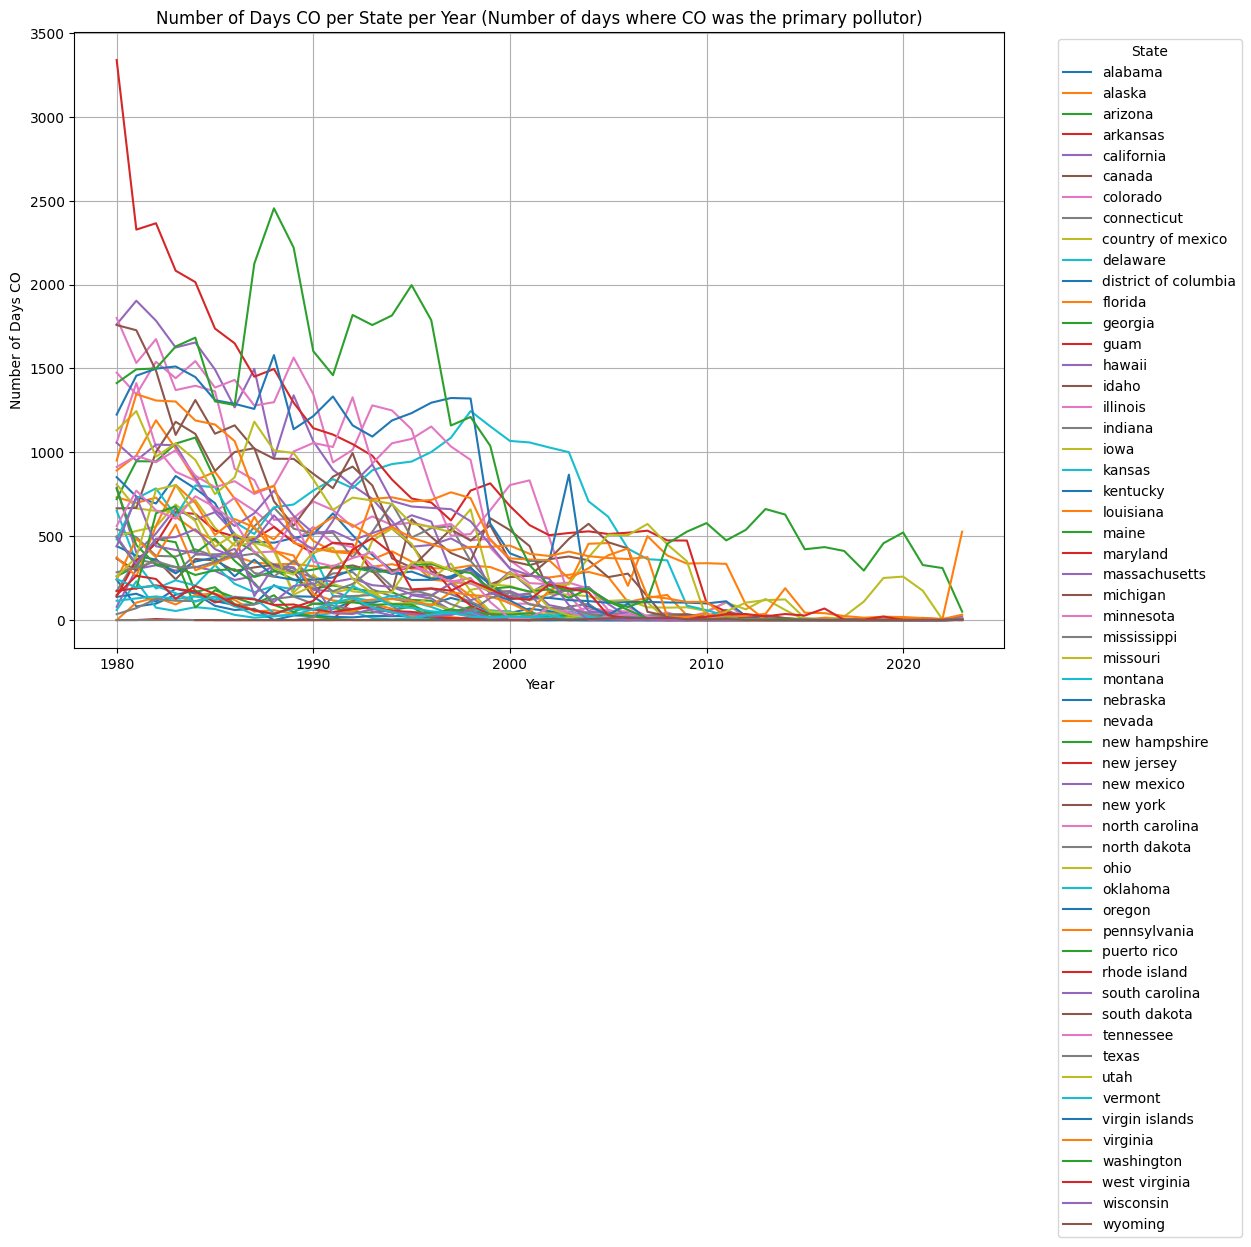

<Figure size 640x480 with 0 Axes>

In [56]:
days_co_per_state_per_year = aq_df.groupby(['State', 'Year'])['Days CO'].sum().reset_index()

states = days_co_per_state_per_year['State'].unique()

plt.figure(figsize=(12, 8)) 

for state in states:
    state_data = days_co_per_state_per_year[days_co_per_state_per_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Days CO'], label=state)

plt.title('Number of Days CO per State per Year (Number of days where CO was the primary pollutor)')
plt.xlabel('Year')
plt.ylabel('Number of Days CO')

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

plt.savefig('../images/number of days CO per state per year')

A steep downward trend accross all but one states where number of days where CO was the main pollutor. Washington spiked around 1988 and again around 1995.

**NO2**

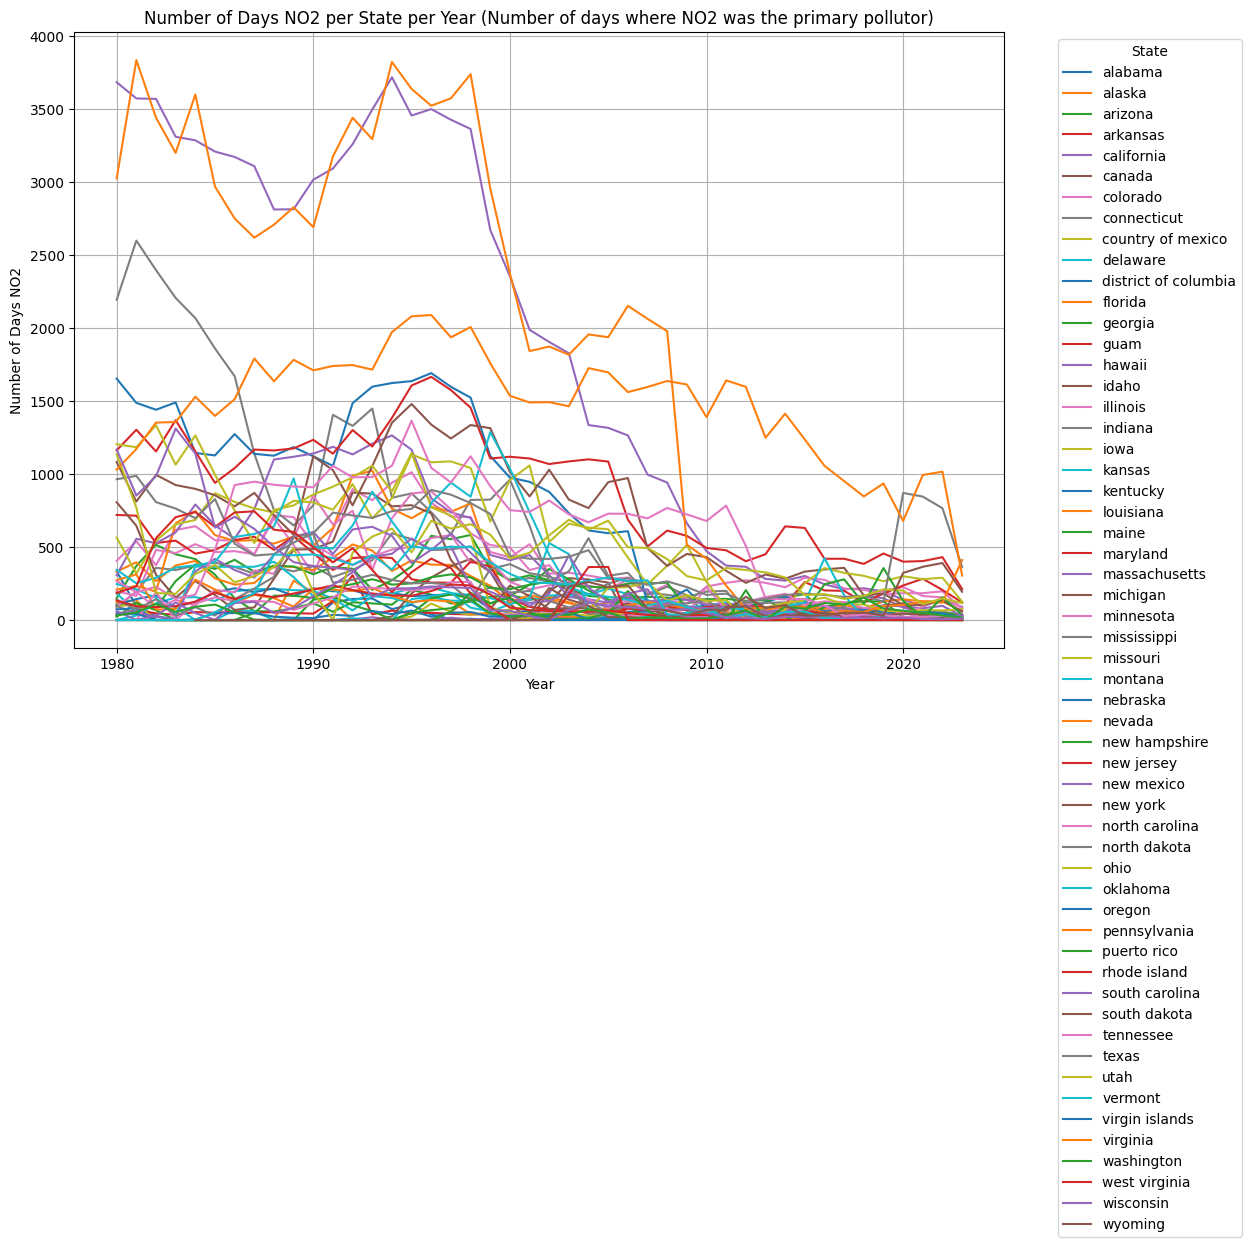

<Figure size 640x480 with 0 Axes>

In [57]:
days_no2_per_state_per_year = aq_df.groupby(['State', 'Year'])['Days NO2'].sum().reset_index()

states = days_no2_per_state_per_year['State'].unique()

plt.figure(figsize=(12, 8)) 

for state in states:
    state_data = days_no2_per_state_per_year[days_no2_per_state_per_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Days NO2'], label=state)

plt.title('Number of Days NO2 per State per Year (Number of days where NO2 was the primary pollutor)')
plt.xlabel('Year')
plt.ylabel('Number of Days NO2')

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

plt.savefig('../images/number of days NO2 per state per year')

A general downward trend in days NO2

**Ozone**

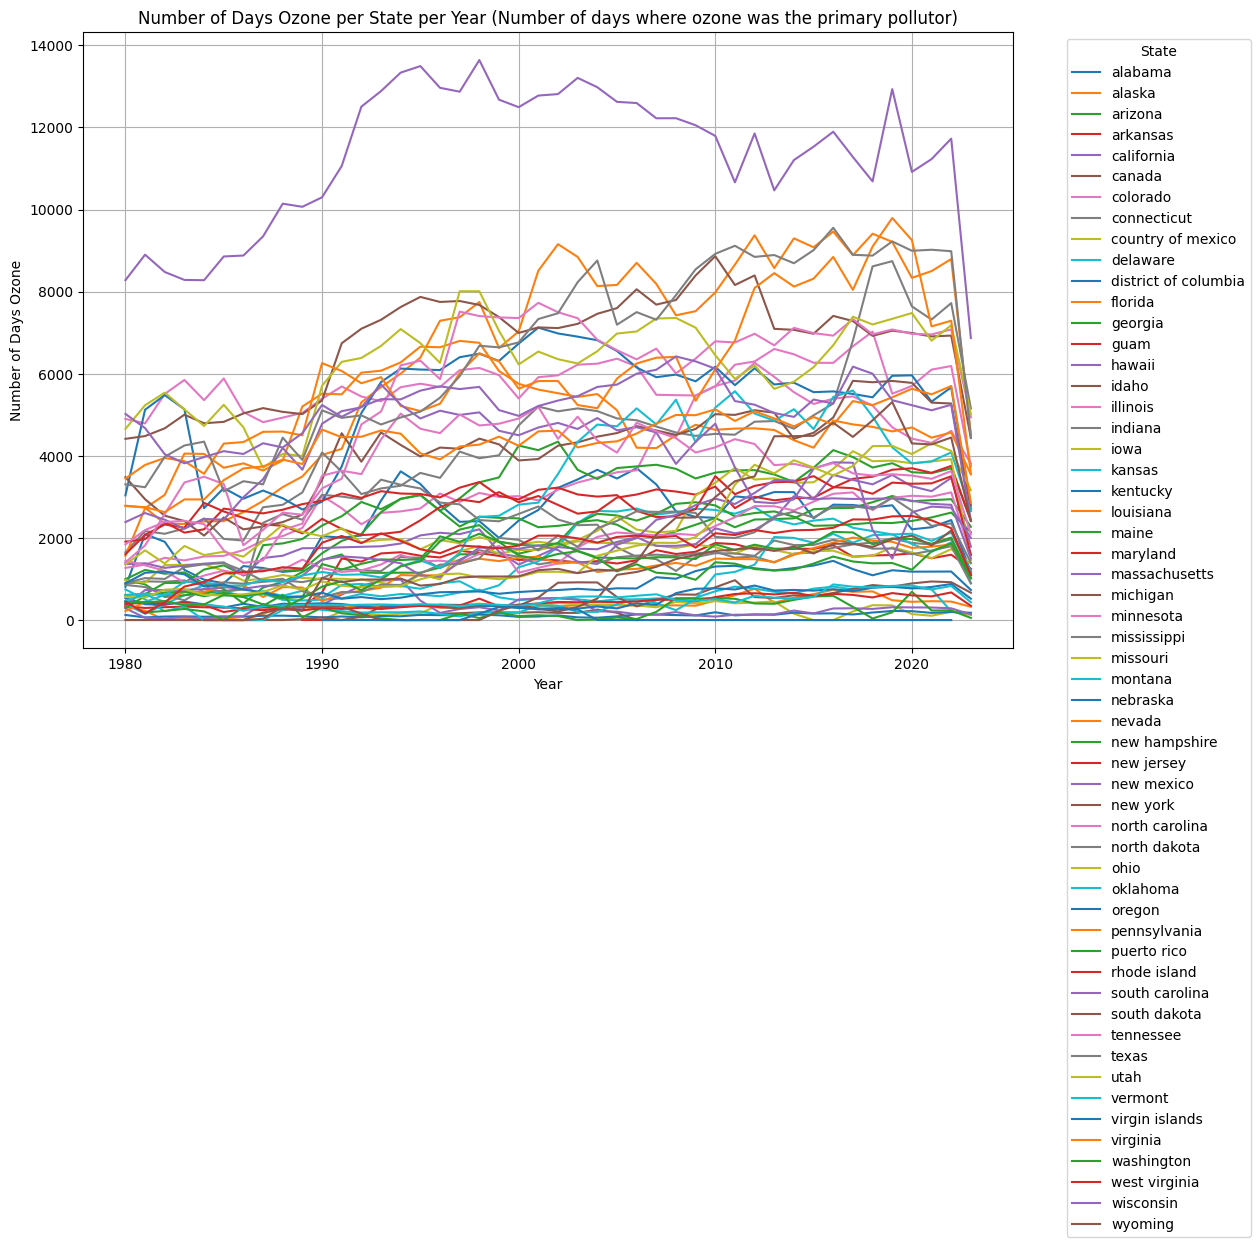

<Figure size 640x480 with 0 Axes>

In [58]:
days_ozone_per_state_per_year = aq_df.groupby(['State', 'Year'])['Days Ozone'].sum().reset_index()

states = days_ozone_per_state_per_year['State'].unique()

plt.figure(figsize=(12, 8)) 

for state in states:
    state_data = days_ozone_per_state_per_year[days_ozone_per_state_per_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Days Ozone'], label=state)

plt.title('Number of Days Ozone per State per Year (Number of days where ozone was the primary pollutor)')
plt.xlabel('Year')
plt.ylabel('Number of Days Ozone')

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

plt.savefig('../images/number of days ozone per state per year')

A clear upward trend accross all states in days ozone.  

**PM2.5**

In [59]:
days_PM25_per_state_per_year = aq_df.groupby(['State', 'Year'])['Days PM2.5'].sum().reset_index()

states = days_PM25_per_state_per_year['State'].unique()

plt.figure(figsize=(12, 8)) 

for state in states:
    state_data = days_PM25_per_state_per_year[days_PM25_per_state_per_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Days PM2.5'], label=state)

plt.title('Number of Days PM2.5 per State per Year (Number of days where PM2.5 was the primary pollutor)')
plt.xlabel('Year')
plt.ylabel('Number of Days PM2.5')

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

plt.savefig('../images/number of days PM25 per state per year')

<Figure size 640x480 with 0 Axes>

An explosion in days PM2.5 from around 1998 onward. More can be read on this at sources below 

[source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10475088/)

[source](https://earthobservatory.nasa.gov/images/86075/changing-views-of-fine-particulate-pollution)

[source](https://www.epa.gov/sites/default/files/2017-11/documents/trends_report_1998.pdf)

**PM10**

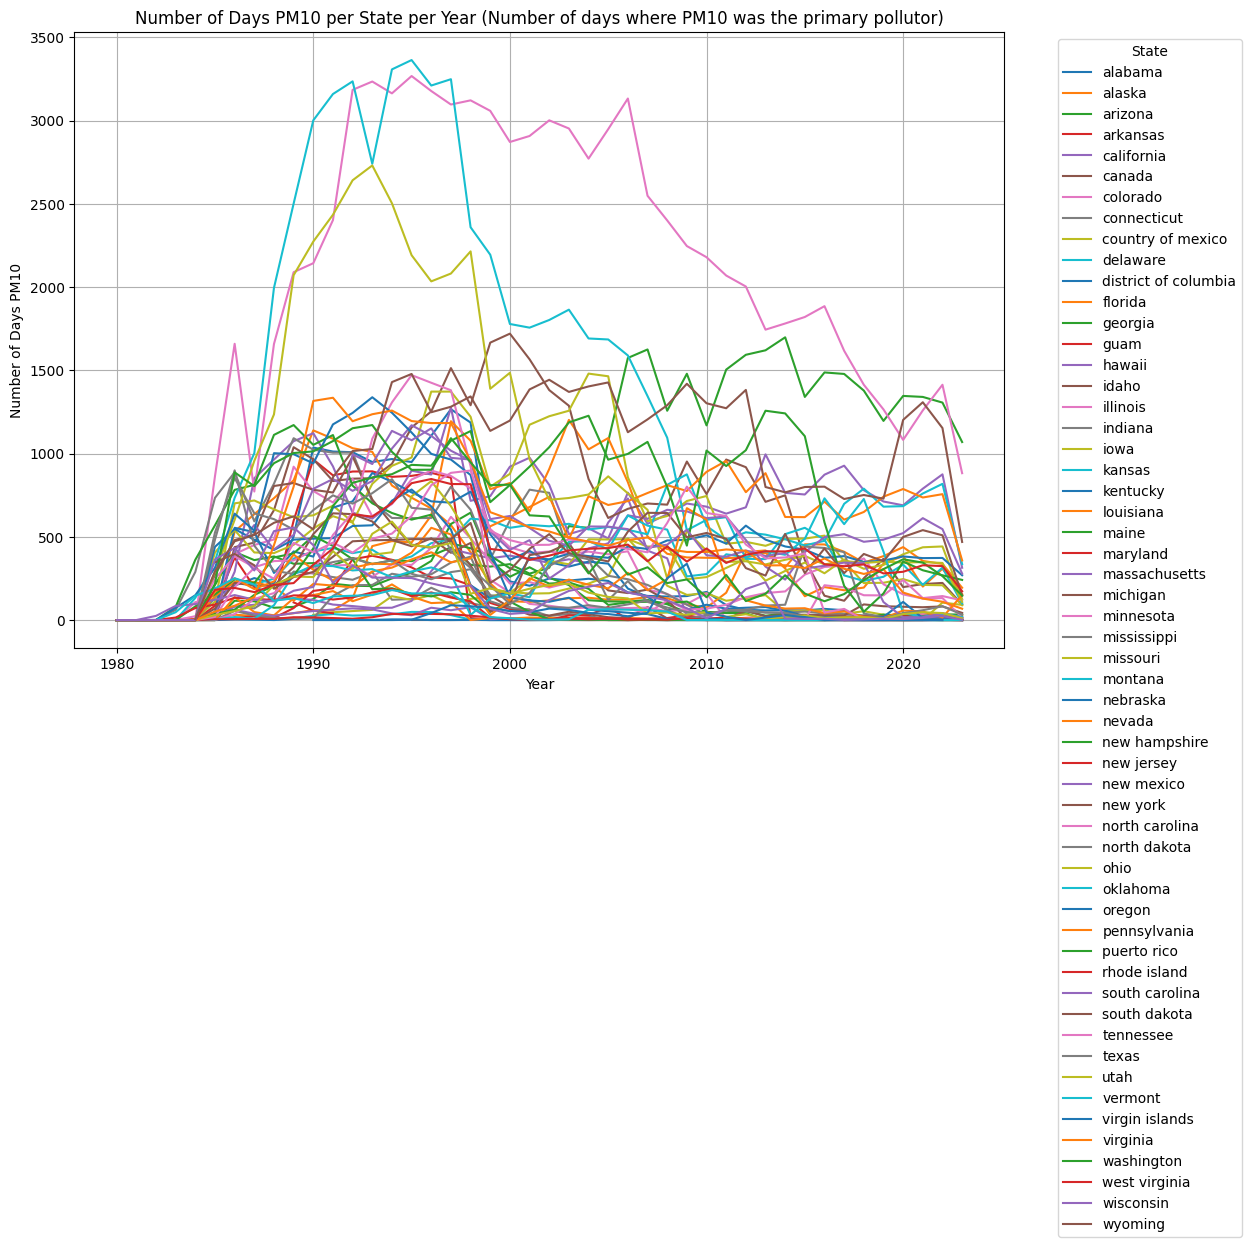

<Figure size 640x480 with 0 Axes>

In [60]:
days_PM10_per_state_per_year = aq_df.groupby(['State', 'Year'])['Days PM10'].sum().reset_index()

states = days_PM10_per_state_per_year['State'].unique()

plt.figure(figsize=(12, 8)) 

for state in states:
    state_data = days_PM10_per_state_per_year[days_PM10_per_state_per_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Days PM10'], label=state)

plt.title('Number of Days PM10 per State per Year (Number of days where PM10 was the primary pollutor)')
plt.xlabel('Year')
plt.ylabel('Number of Days PM10')

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

plt.savefig('../images/number of days PM10 per state per year')

With a boom from around 1983 onwards, the number of days where PM10 was the main pollutor are slowly decreasing.

It seems that the number of days of PM2.5, PM10 and Ozone have significantly high levels and, for the most part, a rising (if not steady state) trend. These three pollutants are commonly associated with global warming and combustion of fossil fuels. More can be read on the [EPA's Report](https://www.epa.gov/sites/default/files/2017-11/documents/trends_report_1998.pdf)

# Creating merged dataframe for further eda and modelling

In [61]:
air_quality = pd.read_csv('../data/air_quality_master.csv')
bee_survey = pd.read_csv('../data/Data_Bees/processed_dfs/state_survey_processed.csv')

In [62]:
air_quality.head()

Unnamed: 0    State      County  Year  Days with AQI  Good Days  \
0           0  alabama     cullman  1985            214        144   
1           1  alabama      etowah  1985            282        176   
2           2  alabama   jefferson  1985            365        202   
3           3  alabama      mobile  1985            284        214   
4           4   alaska  anchorage   1985            365        228   

   Moderate Days  Unhealthy for Sensitive Groups Days  Unhealthy Days  \
0             59                                   11               0   
1             81                                   23               2   
2            130                                   25               7   
3             58                                   11               1   
4            116                                   19               2   

   Very Unhealthy Days  Hazardous Days  Max AQI  90th Percentile AQI  \
0                    0               0      150                   87   
1                    0               0      154                   97   
2                    1               0      202                  100   
3                    0               0      172                   71   
4                    0               0      154                   84   

   Median AQI  Days CO  Days NO2  Days Ozone  Days PM2.5  Days PM10  
0          44        0         0         214           0          0  
1          45        0         0         257           0         25  
2          48      113         0         171           0         81  
3          40        0         0         255           0         29  
4          38      292         0          46           0         27

In [63]:
bee_survey.head()

Unnamed: 0  Year       State   Value
0           0  1987     alabama   46000
1           1  1987     arizona   80000
2           2  1987    arkansas   29000
3           3  1987  california  540000
4           4  1987    colorado   44000

In [64]:
air_quality.drop(columns = 'Unnamed: 0', inplace = True)
                 
bee_survey.drop(columns = 'Unnamed: 0', inplace = True)

In [65]:
air_quality.columns

Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days PM2.5', 'Days PM10'],
      dtype='object')

In [66]:
# Renaming column to Bee Colonies 
bee_survey.columns = ['Year', 'State', 'Bee Colonies']

In [67]:
bee_survey

Year       State  Bee Colonies
0     1987     alabama         46000
1     1987     arizona         80000
2     1987    arkansas         29000
3     1987  california        540000
4     1987    colorado         44000
...    ...         ...           ...
1833  2017     wyoming          6100
1834  2017     wyoming         60500
1835  2017     wyoming         47000
1836  2017     wyoming          1260
1837  2017     wyoming          4700

[1838 rows x 3 columns]

In [68]:
air_quality

State      County  Year  Days with AQI  Good Days  Moderate Days  \
0      alabama     cullman  1985            214        144             59   
1      alabama      etowah  1985            282        176             81   
2      alabama   jefferson  1985            365        202            130   
3      alabama      mobile  1985            284        214             58   
4       alaska  anchorage   1985            365        228            116   
...        ...         ...   ...            ...        ...            ...   
40490  wyoming     laramie  1988             54         53              1   
40491  wyoming        park  1988             51         39             12   
40492  wyoming    sheridan  1988            278        206             70   
40493  wyoming    sublette  1988             70         70              0   
40494  wyoming       teton  1988            309        257             49   

       Unhealthy for Sensitive Groups Days  Unhealthy Days  \
0                                       11               0   
1                                       23               2   
2                                       25               7   
3                                       11               1   
4                                       19               2   
...                                    ...             ...   
40490                                    0               0   
40491                                    0               0   
40492                                    2               0   
40493                                    0               0   
40494                                    3               0   

       Very Unhealthy Days  Hazardous Days  Max AQI  90th Percentile AQI  \
0                        0               0      150                   87   
1                        0               0      154                   97   
2                        1               0      202                  100   
3                        0               0      172                   71   
4                        0               0      154                   84   
...                    ...             ...      ...                  ...   
40490                    0               0       52                   26   
40491                    0               0       98                   61   
40492                    0               0      115                   62   
40493                    0               0       32                   24   
40494                    0               0      147                   56   

       Median AQI  Days CO  Days NO2  Days Ozone  Days PM2.5  Days PM10  
0              44        0         0         214           0          0  
1              45        0         0         257           0         25  
2              48      113         0         171           0         81  
3              40        0         0         255           0         29  
4              38      292         0          46           0         27  
...           ...      ...       ...         ...         ...        ...  
40490          16        0         0           0           0         54  
40491          28        0         0           0           0         51  
40492          38        0         0           0           0        278  
40493          11        0         0           0          70          0  
40494          40        0         0         270           8         31  

[40495 rows x 18 columns]

In [69]:
# Merging the datasets on Year and State 
data = pd.merge(bee_survey, air_quality, on=['Year', 'State'])

In [70]:
data.isnull().sum()

Year                                   0
State                                  0
Bee Colonies                           0
County                                 0
Days with AQI                          0
Good Days                              0
Moderate Days                          0
Unhealthy for Sensitive Groups Days    0
Unhealthy Days                         0
Very Unhealthy Days                    0
Hazardous Days                         0
Max AQI                                0
90th Percentile AQI                    0
Median AQI                             0
Days CO                                0
Days NO2                               0
Days Ozone                             0
Days PM2.5                             0
Days PM10                              0
dtype: int64

In [71]:
data

Year    State  Bee Colonies      County  Days with AQI  Good Days  \
0      1987  alabama         46000     cullman            125         73   
1      1987  alabama         46000      etowah             59         40   
2      1987  alabama         46000   jefferson            365        167   
3      1987  alabama         46000     madison            237        149   
4      1987  alabama         46000      mobile            287        199   
...     ...      ...           ...         ...            ...        ...   
39381  2017  wyoming          4700    sublette            365        228   
39382  2017  wyoming          4700  sweetwater            365        260   
39383  2017  wyoming          4700       teton            365        299   
39384  2017  wyoming          4700       uinta            365        310   
39385  2017  wyoming          4700      weston            289        257   

       Moderate Days  Unhealthy for Sensitive Groups Days  Unhealthy Days  \
0                 31                                   16               5   
1                 19                                    0               0   
2                158                                   36               4   
3                 60                                   22               6   
4                 70                                   16               2   
...              ...                                  ...             ...   
39381            129                                    8               0   
39382            100                                    2               2   
39383             65                                    1               0   
39384             53                                    1               0   
39385             32                                    0               0   

       Very Unhealthy Days  Hazardous Days  Max AQI  90th Percentile AQI  \
0                        0               0      177                  115   
1                        0               0       70                   57   
2                        0               0      182                  105   
3                        0               0      172                  108   
4                        0               0      154                   84   
...                    ...             ...      ...                  ...   
39381                    0               0      150                   71   
39382                    1               0      264                   65   
39383                    0               0      118                   59   
39384                    0               1      696                   54   
39385                    0               0       93                   51   

       Median AQI  Days CO  Days NO2  Days Ozone  Days PM2.5  Days PM10  
0              47        0         0         125           0          0  
1              39        0         0           0           0         59  
2              52       94         0         158           0        113  
3              45        0         0         237           0          0  
4              43        0         0         247           0         40  
...           ...      ...       ...         ...         ...        ...  
39381          48        0         0         345          20          0  
39382          46        0         1         321           7         36  
39383          44        0         0         341          24          0  
39384          44        0         3         348           0         14  
39385          41        0         0         289           0          0  

[39386 rows x 19 columns]

In [72]:
# Exporting merged dataframe
data.to_csv('../data/modelling_dataframe.csv')